# importing libraries:


In [10]:
pip install pandas numpy scikit-learn nltk matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARINI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HARINI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# load datasets

In [12]:
df = pd.read_csv("amazon_reviews_sample.csv")
df.head()


,review_text,rating
0,"This product is amazing, works perfectly!",5
1,"Terrible quality, broke after one use.",1
2,I am very satisfied with this purchase.,5
3,"Worst product ever, total waste of money.",1
4,"Good value for money, highly recommend.",4


# Label Creation

In [13]:
def label_from_rating(r):
    if r >= 4: return 1   # Positive
    if r <= 2: return 0   # Negative
    return None

df['label'] = df['rating'].apply(label_from_rating)
df = df[df['label'].notnull()]
df


,review_text,rating,label
0,"This product is amazing, works perfectly!",5,1.0
1,"Terrible quality, broke after one use.",1,0.0
2,I am very satisfied with this purchase.,5,1.0
3,"Worst product ever, total waste of money.",1,0.0
4,"Good value for money, highly recommend.",4,1.0
6,"Excellent! Exactly as described, very happy.",5,1.0
7,"Do not buy this, very disappointing.",2,0.0
8,"I love this product, it exceeded expectations!",5,1.0
9,"Bad quality, not worth the price.",1,0.0


# Preprocessing

In [14]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>',' ',text)
    text = re.sub(r'http\S+|www.\S+',' ',text)
    text = re.sub(r'[^a-z\s]',' ',text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['review_text'].apply(clean_text)
df.head()


,review_text,rating,label,clean_text
0,"This product is amazing, works perfectly!",5,1.0,product amazing work perfectly
1,"Terrible quality, broke after one use.",1,0.0,terrible quality broke one use
2,I am very satisfied with this purchase.,5,1.0,satisfied purchase
3,"Worst product ever, total waste of money.",1,0.0,worst product ever total waste money
4,"Good value for money, highly recommend.",4,1.0,good value money highly recommend


# Train/Test Split

In [15]:
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# Model Training

In [16]:
tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# Evaluation

Accuracy: 0.5
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\HARINI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HARINI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HARINI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

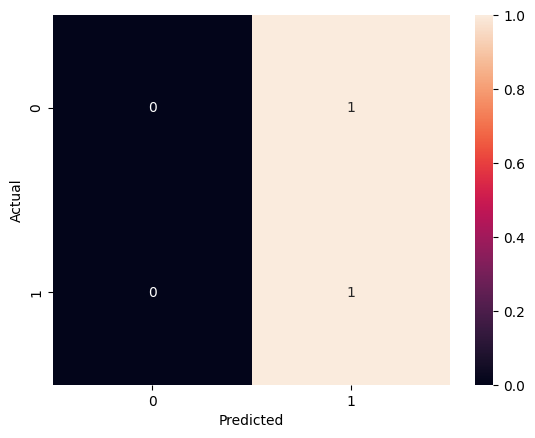

In [17]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Prediction Function

In [18]:
def predict_review(text):
    ct = clean_text(text)
    v = tfidf.transform([ct])
    pred = model.predict(v)[0]
    return "Positive" if pred==1 else "Negative"

print(predict_review("This product is amazing, I loved it!"))
print(predict_review("Worst product ever, waste of money."))


Positive
Negative
